# Preparations 

In [28]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
# Iris dataset
iris = datasets.load_iris(return_X_y=True, as_frame=True)
iris_df = iris[0] #use first iris data set

solving the setting up issues: 
```Bash
Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser #issue resolved with ChatGPT

virtualenv venv # create new venv

.\venv\Scripts\activate #activate current venv
```

In [6]:
# checking the virtual environment:

iris_df.head() # Ausgabe der ersten fünf Zeilen des DataFrames

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Task 1.1 Inroduction**

- create function *calcMeans* using *apply* function
- calculates means of each column
- *desrcibe* function to validate results of *calcMeans*

In [8]:
# function calcMeans: 
def calcMeans(dataframe):
    return dataframe.apply(lambda col: col.mean(), axis=0)

In [10]:
# function calcMeans on iris dataset
print(calcMeans(iris_df))

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [11]:
# validate results with describe function
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


### Results
the means resulting from *calcMeans* are the same as using *describe* function

# **Task 2.1 Unsupervised preprocessing and visualization**

- load dataset food.csv
- Get an overview by analyzing dimension, number of missing values and feature scaling
- Preprocess data using z-transformation
- Perform a principal component analysis
- Create a score plot using PC1 and PC2
- You will need the following imports:
    - *from sklearn.decomposition import PCA*
    - *from sklearn.preprocessing import StandardScaler*

In [2]:
# preparations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
# loading the CSV file into a DataFrame
food_df= pd.read_csv("food.csv", index_col=0)
print(food_df)

                RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  Nuts  \
Albania            10.1        1.4   0.5   8.9   0.2     42.3     0.6   5.5   
Austria             8.9       14.0   4.3  19.9   2.1     28.0     3.6   1.3   
Belgium            13.5        9.3   4.1  17.5   4.5     26.6     5.7   2.1   
Bulgaria            7.8        6.0   1.6   8.3   1.2     56.7     1.1   3.7   
Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   1.1   
Denmark            10.6       10.8   3.7  25.0   9.9     21.9     4.8   0.7   
E Germany           8.4       11.6   3.7  11.1   5.4     24.6     6.5   0.8   
Finland             9.5        4.9   2.7  33.7   5.8     26.3     5.1   1.0   
France             18.0        9.9   3.3  19.5   5.7     28.1     4.8   2.4   
Greece             10.2        3.0   2.8  17.6   5.9     41.7     2.2   7.8   
Hungary             5.3       12.4   2.9   9.7   0.3     40.1     4.0   5.4   
Ireland            13.9       10.0   4.7  25.8   2.2

In [ ]:
# analyzing dimension, missing values and feature scaling
print(food_df.shape) # gives dimension of dataset

# dataset has 25 rows and 9 columns

print(food_df.isnull().sum()) # gives total number of missing values per column
#print(food_df.isnull().sum().sum()) # gives total number of missing values 

# dataset has 0 missing values

print(food_df.describe()) # gives information about the features per column
print(food_df.min())  # smallest value per column
print(food_df.max()) # largest value per column

(25, 9)
RedMeat      0
WhiteMeat    0
Eggs         0
Milk         0
Fish         0
Cereals      0
Starch       0
Nuts         0
Fr.Veg       0
dtype: int64
         RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr.Veg  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min 

In [ ]:
# preprocessing data using z-transformation

scaler = StandardScaler()               # transformation with sklearn
z_scores_sklearn = pd.DataFrame(
    scaler.fit_transform(food_df),
    index=food_df.index,
    columns=food_df.columns
)

print(z_scores_sklearn)
print(z_scores_sklearn.head()) # prints only the first five rows

# saving the transformed dataset
z_scores_sklearn.to_csv('food_standardized.csv')

                 RedMeat  WhiteMeat      Eggs      Milk      Fish   Cereals  \
Albania         0.082941  -1.794750 -2.224584 -1.179570 -1.225033  0.934804   
Austria        -0.282974   1.686446  1.245621  0.400468 -0.655111 -0.395051   
Belgium         1.119699   0.387905  1.062979  0.055732  0.064791 -0.525246   
Bulgaria       -0.618396  -0.523837 -1.220051 -1.265754 -0.925074  2.273959   
Czechoslovakia -0.039031   0.968104 -0.124197 -0.662467 -0.685107  0.190830   

                  Starch      Nuts    Fr.Veg  
Albania        -2.295965  1.247968 -1.378251  
Austria        -0.422218 -0.910790  0.092789  
Belgium         0.889405 -0.499598 -0.076947  
Bulgaria       -1.983674  0.322786  0.036210  
Czechoslovakia  0.452198 -1.013588 -0.076947  
                 RedMeat  WhiteMeat      Eggs      Milk      Fish   Cereals  \
Albania         0.082941  -1.794750 -2.224584 -1.179570 -1.225033  0.934804   
Austria        -0.282974   1.686446  1.245621  0.400468 -0.655111 -0.395051   
Belgiu

                     PC1       PC2       PC3       PC4       PC5       PC6  \
Albania         3.557238 -1.664102 -1.797551  0.234394  0.023733 -1.055592   
Austria        -1.452006 -1.062702  1.365390  0.171564 -0.952695  0.222932   
Belgium        -1.655480  0.162784  0.221000  0.531464  0.770661 -0.295781   
Bulgaria        3.198708 -1.327895  0.154409  0.218606 -0.494741 -0.709921   
Czechoslovakia -0.378104 -0.615096  1.220603 -0.473550  0.262120 -0.840063   
Denmark        -2.414042  0.291332 -0.767776 -0.987288 -0.767949 -0.173842   
E Germany      -1.451538  0.459586  1.329399 -1.159386  0.431664 -0.661681   
Finland        -1.596104 -0.608293 -2.091770 -1.444493  0.037970  0.851402   
France         -1.518666  0.801560  0.001921  1.997822  0.255623 -0.917485   
Greece          2.285884  1.021701 -0.900803  1.831320 -0.413328  1.168077   
Hungary         1.487493 -0.832777  1.953639 -0.221871 -0.042251  0.550225   
Ireland        -2.718400 -0.779455 -0.020291  0.443692  1.035305

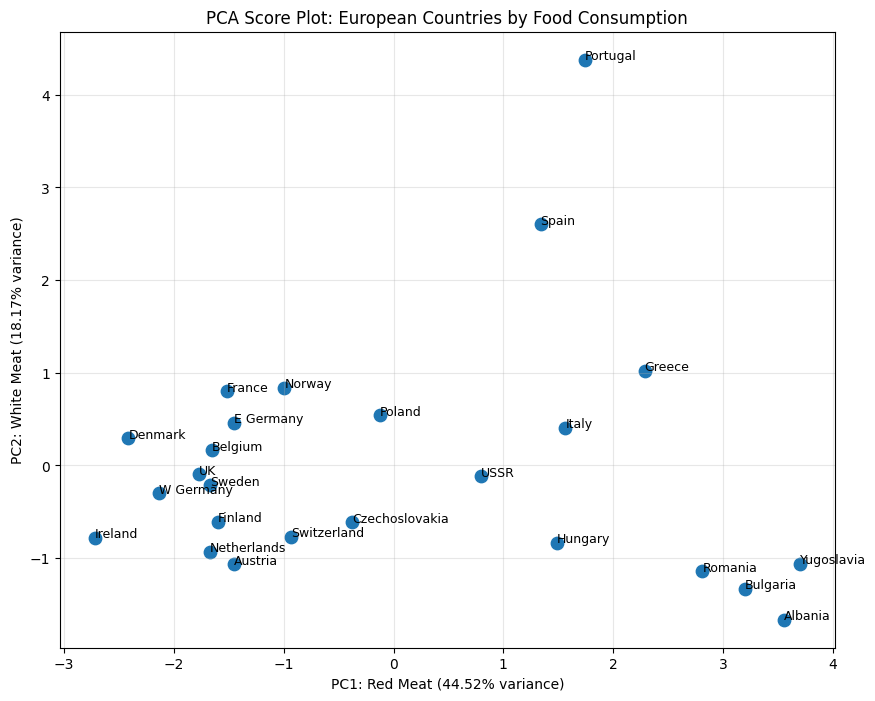

In [54]:
# performing PCA and creating scoreplot
# sources used: https://www.kaggle.com/code/vipulgandhi/pca-beginner-s-guide-to-dimensionality-reduction/notebook

pca = PCA()
pca_data = pca.fit_transform(z_scores_sklearn)
pca_df = pd.DataFrame(
    data=pca_data,
    columns=[f'PC{i+1}' for i in range(z_scores_sklearn.shape[1])],
    index=food_df.index
)

print(pca_df)

# creating scoreplot using PC1 and PC2 [This was solved using Claude.ai. The claude.ai output was then modified]
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=80)

# Add country labels
for i, country in enumerate(pca_df.index):
    plt.annotate(country, (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]), fontsize=9)

# Add labels
plt.xlabel(f'PC1: Red Meat ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2: White Meat ({explained_variance[1]:.2%} variance)')
plt.title('PCA Score Plot: European Countries by Food Consumption')
plt.grid(alpha=0.3)